<a href="https://colab.research.google.com/github/gembuspol/uczenieMaszynowe/blob/main/cwiczenia3_zad2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/palles77/MachineLearning_Exercise4/main/Employee_Compensation_SF.csv')

In [3]:
# function returning column index in a dataframe
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [4]:

(column_first, colum_second) = column_index(dataset, ['Total Benefits', 'Total Compensation'])
# get sample 1000 rows
dataset_for_clustering = dataset.sample(1000).iloc[:, [column_first, colum_second]].values

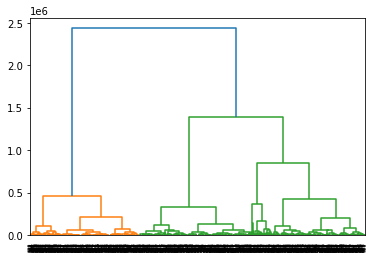

In [5]:
# Drawing dendrogram
dendrogramWard = sch.dendrogram(sch.linkage(dataset_for_clustering, method='ward'))

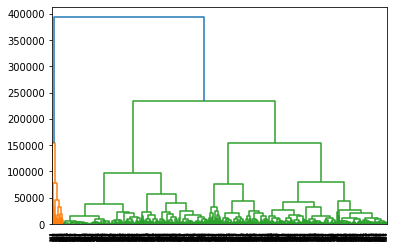

In [6]:
dendrogramComplete = sch.dendrogram(sch.linkage(dataset_for_clustering, method='complete'))


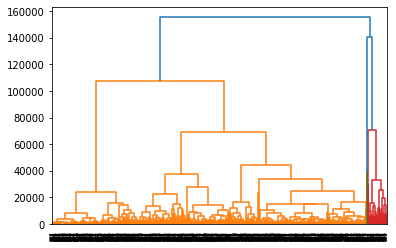

In [7]:
dendrogramAverange = sch.dendrogram(sch.linkage(dataset_for_clustering, method='average'))

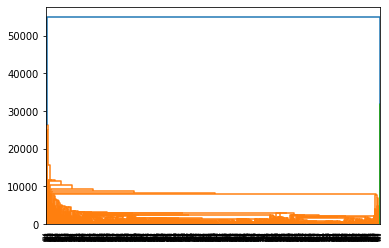

In [8]:
dendrogramSingle = sch.dendrogram(sch.linkage(dataset_for_clustering, method='single'))

In [10]:
model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
X=dataset_for_clustering
model.fit(X)
labels = model.labels_

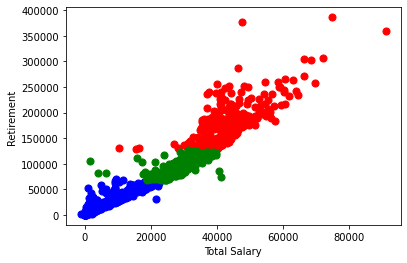

In [11]:
# Drawing Clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.xlabel('Total Salary')
plt.ylabel('Retirement')
plt.show()